#### Name: Pranav Mehendale
#### Roll No.: TCOD34
#### Batch: T11 

# Assignment 6 Group A

## Data Analytics III

1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

2. Compute Confusion to find TP, FP, TN, FN, accuracy, Precision Recall on the given dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df=sns.load_dataset('iris')

In [5]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df['species']=df.species.map({'setosa':0,'versicolor':1,"virginica":2})

In [10]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: >

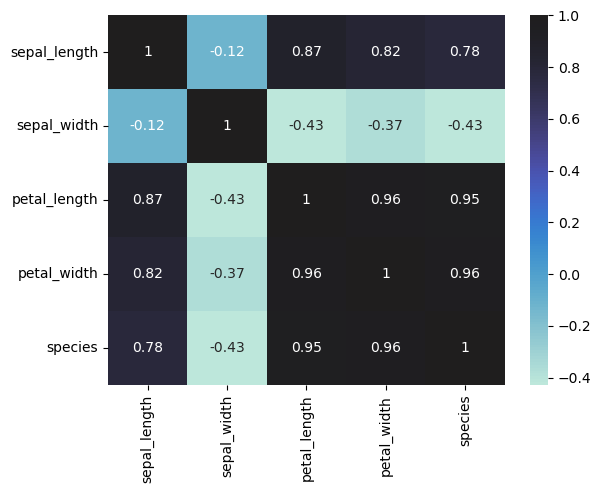

In [11]:
sns.heatmap(df.corr(),annot=True,center=1)

In [12]:
X=df.drop('species',axis=True)
Y=df['species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
Y=df['species']

In [16]:
gb=GaussianNB()
gb.fit(X_train,Y_train)

GaussianNB()

In [17]:
y_pred=gb.predict(X_test)

In [18]:
accuracy_score(Y_test,y_pred)

0.9777777777777777

In [19]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Text(50.722222222222214, 0.5, 'Predicted')

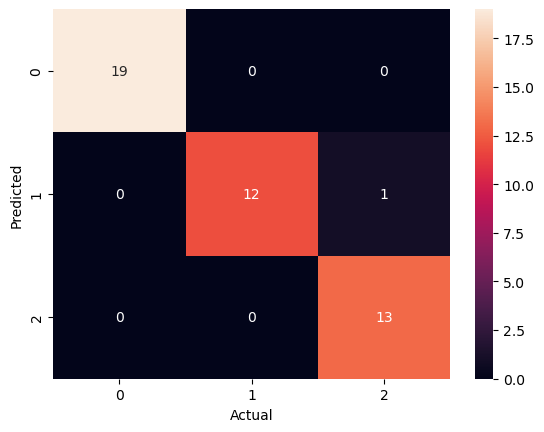

In [20]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [21]:
sns=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [22]:
sns['Actual']=sns.Actual.map({0:'setosa',1:'versicolor',2:'virginic'})
sns['Predicted']=sns.Predicted.map({0:'setosa',1:'versicolor',2:'virginic'})

In [23]:
sns.head(5)

,Actual,Predicted
73,versicolor,versicolor
18,setosa,setosa
118,virginic,virginic
78,versicolor,versicolor
76,versicolor,versicolor
